# Redshift-space Correlation Function

In this example we will calculate the the redshift-space correlation function $\xi(\pi,\sigma)$ in the linear (Kaiser) approximation. Here, $\pi$ and $\sigma$ are the galaxy pair separations along the line of sight and perpendicular to the line of sight, respectively. We also calculate the redshift-space correlation function $\xi(s)$, the average of $\xi(\pi,\sigma)$ at constant $s$, where $s$ is the galaxy separation in redshift space.

In [1]:
import numpy as np
import pyccl as ccl
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

In [2]:
# define a cosmology
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.8, n_s=0.96,transfer_function='boltzmann_class', 
                      matter_power_spectrum='halofit')

Create array for distances, define parameters.

In [3]:
n_s = 10000 # number of points for s array (s = separation between the two galaxies)
s_arr=np.logspace(-2,3,n_s)
N = 100 # no. points for distance arrays
l = 50 # max value for distance arrays in Mpc
pi = np.linspace(0,l,N)
sigma = np.linspace(0,l,N)
a = 1.0 # scale factor
h = 0.7 # Hubble constant
beta = 0.4 # growth factor divided by bias

Calculate $\xi(\pi,\sigma)$ and plot

In [4]:
Xi = np.ones([N,N]); # initialize array for xi(pi, sigma)
for i in range(N):
    Xi[i]=ccl.correlation_pi_sigma(cosmo,a,beta,pi[i],sigma,True);

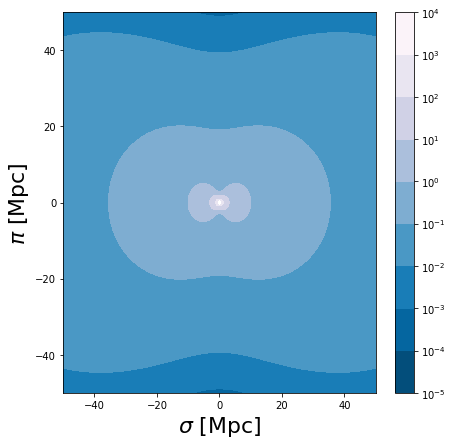

In [5]:
# flip Xi into the other three quadrants (since xi(pi, sigma) is symmetric)
x = np.linspace(-l,l,2*N)
y = np.linspace(-l,l,2*N)
z1 = np.hstack((np.fliplr(Xi),Xi))
z2 = np.flipud(z1)
z = np.vstack((z2,z1))

fig, ax = plt.subplots(figsize=(7, 7)) 
ax.set_xlabel(r'$\sigma$ $[\rm{Mpc}]$',fontsize=22)
ax.set_ylabel(r'$\pi$ $[\rm{Mpc}]$',fontsize=22)
xi_ps=plt.contourf(x, y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig.colorbar(xi_ps)

plt.savefig('xiRsd1.pdf',bbox_inches = 'tight')

Calculate $\xi(s)$ and plot

In [6]:
xi = ccl.correlation_3dRsd_avgmu(cosmo,a,s_arr,beta)

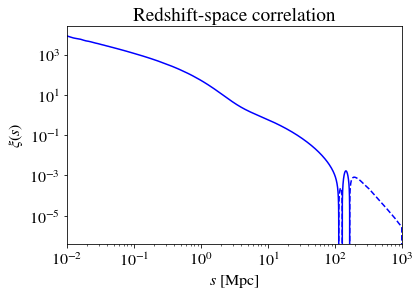

In [10]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

# Define array to hold only the values of xi(s) that are negative, so they can be plotted as a dashed line on log plot
xin = [0.]*n_s # negative xi values
for i in range (0,n_s-1):
    if xi[i] < 0:
        xin[i] = -xi[i]

plt.loglog(s_arr,xi,'b-')
plt.loglog(s_arr,xin,'b--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$s$ $[\rm{Mpc}]$')
plt.ylabel(r'$\xi(s)$')
plt.title('Redshift-space correlation') 
plt.xlim((0.01,1000))
plt.savefig('xiRsd2.pdf',bbox_inches = 'tight')
plt.show()


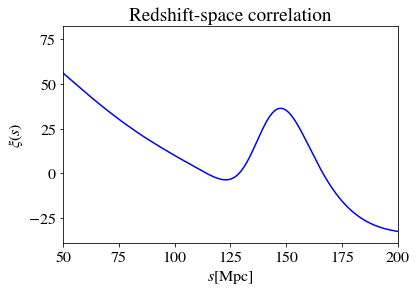

In [8]:
# now plot large s region on linear scale
plt.plot(s_arr, s_arr*s_arr*xi, 'b-')
plt.xlim((50,200))
plt.xlabel(r'$r$ (Mpc)')
plt.ylabel(r'$\xi (s)$')
plt.title('Redshift-space correlation') 
plt.xlabel(r'$s [\mathrm{Mpc}]$')
plt.savefig('xiRsd3.pdf',bbox_inches = 'tight')
plt.show()

In [9]:
ccl.correlation_spline_free()